In [1]:
import os, pdb

import matplotlib.pyplot as plt

import pandas as pd

import numpy as np

import statsmodels.api as sm

In [2]:
ROOT = '../run_methods_example/gray_box/result_csvs/'

In [3]:
epws   = ['victoria.epw', 'chicago.epw']                      # weather
idfs   = ['control_concrete.idf', 'control_wood.idf',         # envelope
          'control_concrete_inf.idf', 'control_wood_inf.idf'] # infiltration
scheds = [False, True]                                        # schedules


# mOrders = ['Ti2', 'TiTe1']
dts     = ['dt_jan7_5', 'dt_jan14_5']


mOrders = ['Ti2', 'TiTe1', 'TiTeInf']
# dts     = ['dt_jan7_5', 'dt_jan14_5']

In [4]:
def get_all_case_results(mOrder, dt):
    results = {}
    for epw in epws:
        for idf in idfs:
            for sched in scheds:
                try:
                    fname = f'rc_{mOrder}_{dt}_{epw[:-4]}_{idf[:-4]}_sched{sched}.csv'
                    pthname = os.path.join(ROOT, fname)
                    print(fname)
                    df = pd.read_csv(pthname)#.dropna()
                    print(len(df))
#                     df = df[df['err'] < 10]
                    results[(epw[:-4], idf[:-4],  sched)] = df

                except FileNotFoundError as e:
                    print(e)
                    print('did not find', fname)
                except KeyError as e:
                    print('missing key')
                    results[(epw[:-4], idf[:-4],  sched)] = df
    return results

results = {}
for mOrder in mOrders:
    for dt in dts:
        case_results = get_all_case_results(mOrder, dt)
        results[(mOrder, dt)] = case_results

rc_Ti2_dt_jan7_5_victoria_control_concrete_schedFalse.csv
181
rc_Ti2_dt_jan7_5_victoria_control_concrete_schedTrue.csv
181
rc_Ti2_dt_jan7_5_victoria_control_wood_schedFalse.csv
1
rc_Ti2_dt_jan7_5_victoria_control_wood_schedTrue.csv
1
rc_Ti2_dt_jan7_5_victoria_control_concrete_inf_schedFalse.csv
1
rc_Ti2_dt_jan7_5_victoria_control_concrete_inf_schedTrue.csv
1
rc_Ti2_dt_jan7_5_victoria_control_wood_inf_schedFalse.csv
179
rc_Ti2_dt_jan7_5_victoria_control_wood_inf_schedTrue.csv
180
rc_Ti2_dt_jan7_5_chicago_control_concrete_schedFalse.csv
179
rc_Ti2_dt_jan7_5_chicago_control_concrete_schedTrue.csv
179
rc_Ti2_dt_jan7_5_chicago_control_wood_schedFalse.csv
179
rc_Ti2_dt_jan7_5_chicago_control_wood_schedTrue.csv
179
rc_Ti2_dt_jan7_5_chicago_control_concrete_inf_schedFalse.csv
179
rc_Ti2_dt_jan7_5_chicago_control_concrete_inf_schedTrue.csv
179
rc_Ti2_dt_jan7_5_chicago_control_wood_inf_schedFalse.csv
179
rc_Ti2_dt_jan7_5_chicago_control_wood_inf_schedTrue.csv
179
rc_Ti2_dt_jan14_5_victoria_contr

EmptyDataError: No columns to parse from file

In [5]:
results.keys()

dict_keys([('Ti2', 'dt_jan7_5'), ('Ti2', 'dt_jan14_5')])

In [7]:
# results[('TiTeInf', 'dt_jan7_5')][('victoria','control_concrete',False)]['err'].hist()

# Visualize Each RC Method

/home/gbaasch/envs/dl3.6/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/home/gbaasch/envs/dl3.6/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1685: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/home/gbaasch/envs/dl3.6/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1685: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


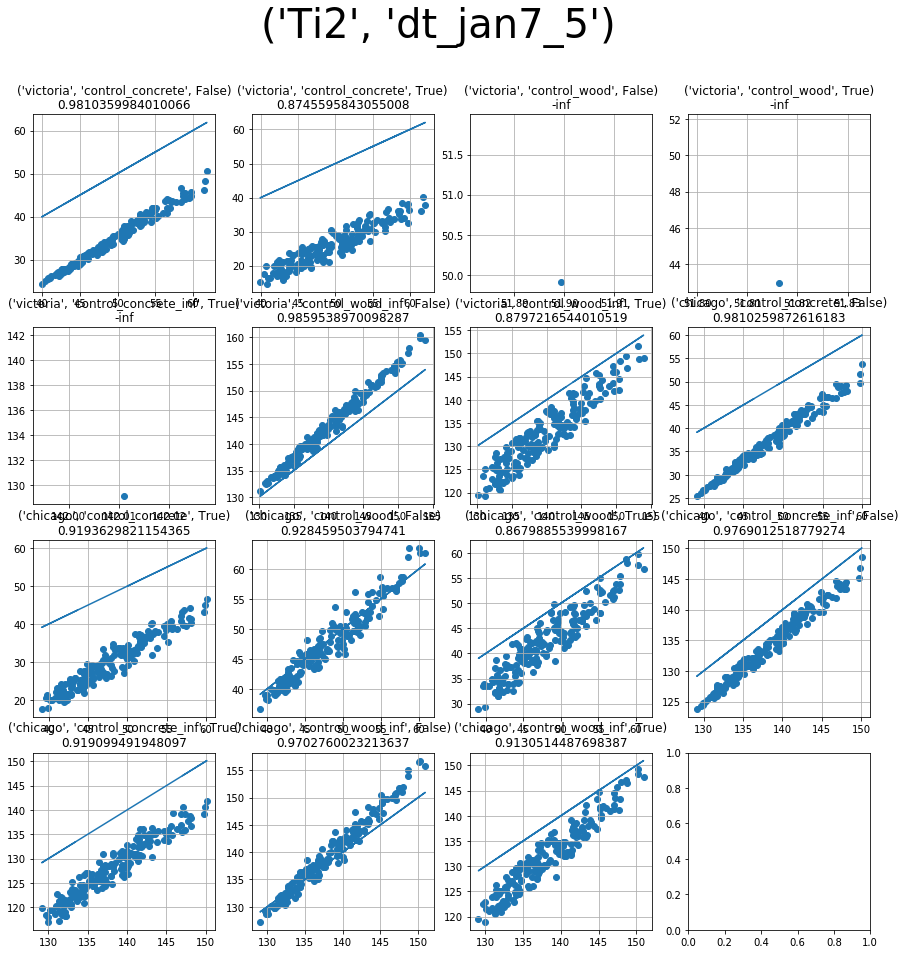

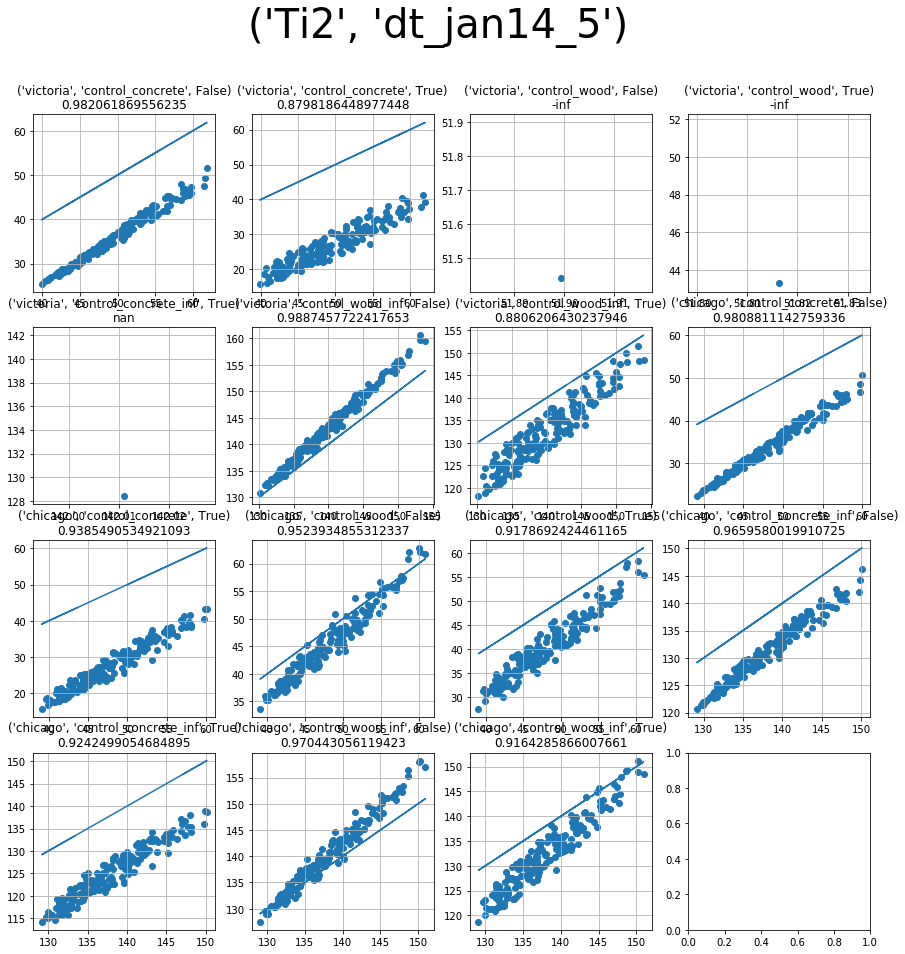

In [8]:
def get_rsquared(x, y):
    X = sm.add_constant(x, has_constant='add')
    model = sm.OLS(y, X).fit()
    return model.rsquared

for rc_case, rc_results in results.items():
    fig, axes = plt.subplots(4, 4, figsize=(15,15))
    it = 0
    fig.suptitle(rc_case, fontsize=40)
    for building_case, df in rc_results.items():
        
        if it < 4: i = 0
        elif it < 8: i = 1
        elif it < 12: i = 2
        elif it < 16: i = 3
        j = it%4
        try:
            x, y = df['hlc_tot']+ df['hlc_inf_standard'], df['hlc_tot_pred']
#             plt.plot(df['err'].hist())

            axes[i,j].set_title(str(building_case) + '\n' + str(get_rsquared(x,y)) )
            axes[i,j].scatter(x, y)
            axes[i,j].plot(x,x)
            axes[i,j].grid()
            it += 1
        except KeyError as e:
            ## Not all the models finished running
            pass

In [ ]:
def get_rsquared(x, y):
    X = sm.add_constant(x, has_constant='add')
    model = sm.OLS(y, X).fit()
    return model.rsquared

for rc_case, rc_results in results.items():
    fig, axes = plt.subplots(4, 4, figsize=(15,15))
    it = 0
    fig.suptitle(rc_case, fontsize=40)
    for building_case, df in rc_results.items():
        
        if it < 4: i = 0
        elif it < 8: i = 1
        elif it < 12: i = 2
        elif it < 16: i = 3
        j = it%4
        try:
#             x, y = df['hlc_tot']+ df['hlc_inf_standard'], df['hlc_tot_pred']
            df['err'].hist(ax=axes[i,j])

#             axes[i,j].set_title(str(building_case) + '\n' + str(get_rsquared(x,y)) )
#             axes[i,j].scatter(x, y)
#             axes[i,j].plot(x,x)
#             axes[i,j].grid()
            it += 1
        except KeyError as e:
            ## Not all the models finished running
            pass

# Check the log likelihoods

In [ ]:
def add_dict_list(d, i, key):
    di = d.get(key)
    if d.get(key):
        di.append(i)
    else:
        d[key] = [i]

In [53]:
rc_result_dir = '../rc_results'

In [44]:
!ls ../rc_results/chicago_control_concrete_inf_schedFalse/chicago_control_concrete_inf_schedFalse_job101/control_concrete_inf_1_dt_jan7_5_TiTe1

aggregated.csv	fit.csv  preds.csv


In [106]:
logliks = {}

for building_case in os.listdir(rc_result_dir):
    building_case = os.path.join(rc_result_dir, building_case)
    for job in os.listdir(building_case):
        job = os.path.join(building_case, job)
        for rc_case_job in os.listdir(job):
            for mOrder in mOrders:
                for dt in dts:
                    if mOrder in rc_case_job and dt in rc_case_job:
                        try:
                            rc_case_job = os.path.join(job, rc_case_job)

                            agg_csv = os.path.join(rc_case_job,'aggregated.csv')

    #                         print(mOrder, dt, rc_case_job)
                            loglik = pd.read_csv(agg_csv)['loglik'].values[0]
                            add_dict_list(logliks, loglik, (mOrder, dt))
                        except FileNotFoundError as e:
#                             print(agg_csv)
                            pass
        

In [111]:
for k, val in logliks.items():
    print(k, np.mean(val))

('TiTeInf', 'dt_jan7_5') 3449.0716539890186
('TiTe1', 'dt_jan7_5') 3540.7927326714753


In [103]:
csv = '../rc_results/chicago_control_concrete_inf_schedFalse/chicago_control_concrete_inf_schedFalse_job101/control_concrete_inf_1_dt_jan7_5_TiTe1/preds.csv'
pd.read_csv(csv)

Unnamed: 0     yTiHat     residuals             timedate
0              1  16.851396 -6.298517e-09  2006-01-01 00:00:00
1              2  16.597483  6.591707e-03  2006-01-01 00:05:00
2              3  16.364290  4.377069e-02  2006-01-01 00:10:00
3              4  16.228254 -2.171152e-01  2006-01-01 00:15:00
4              5  15.565190  1.052942e-01  2006-01-01 00:20:00
...          ...        ...           ...                  ...
1724        1725   6.888391 -1.353071e-03  2006-01-06 23:40:00
1725        1726   6.821458 -1.223785e-03  2006-01-06 23:45:00
1726        1727   6.754423 -1.197829e-03  2006-01-06 23:50:00
1727        1728   6.687222 -1.209891e-03  2006-01-06 23:55:00
1728        1729   6.619806  1.197136e-02  2006-01-07 00:00:00

[1729 rows x 4 columns]

In [49]:
loglik = pd.read_csv(csv)['loglik'].values[0]

6122.597119049829

In [62]:
loglik

6122.597119049829

In [100]:
pd.read_csv(csv)

Unnamed: 0      hcl_lb  hcl_actual      hcl_ub       loglik  nparam
0           1 -305.879253  217.232535  740.344323  6122.597119      10

In [76]:
test = {}

In [77]:
add_dict_list(test, 1, 'key1')

In [78]:
test

{'key1': [1]}

In [79]:
add_dict_list(test, 2, 'key1')

In [80]:
test

{'key1': [1, 2]}

In [81]:
add_dict_list(test, 2, 'key3')

In [82]:
test

{'key1': [1, 2], 'key3': [2]}